# Include library

In [83]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Linear Path in Algebra

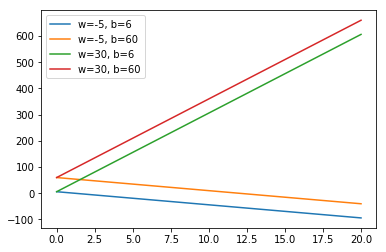

In [21]:
x = np.linspace(0, 20, 20).reshape(-1,1)
ws = [-5, 30]
bs = [6, 60]
for w in ws:
    for b in bs:
        y = np.dot(x, [w]) + b
        plt.plot(x.reshape(-1), y, label='w=%d, b=%d' % (w, b))
plt.legend()
plt.show()

# Compare Linear Regression between other model machine learning
* Neural Network
* SVM
* Random Forest
* Linear Regression

[Article for linear regression and spline regression](https://www.analyticsvidhya.com/blog/2015/10/regression-python-beginners/)

## Load dataset

In [81]:
boston = load_boston()
df = pd.DataFrame(np.c_[boston.data, boston.target], columns=list(boston.feature_names)+['target'])[['LSTAT', 'target']]
data = df.LSTAT.values.reshape(-1,1)
target = df.target.values
x_axis = np.linspace(df.LSTAT.values.min(), df.LSTAT.values.max(), 100)

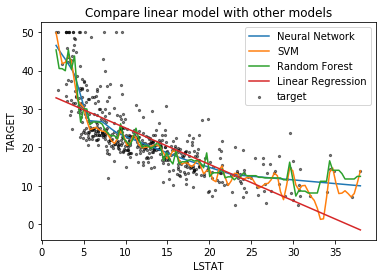

In [91]:
models = [
    ('Neural Network', MLPRegressor(solver='lbfgs', hidden_layer_sizes=(30,30))),
    ('SVM', SVR(C=100)),
    ('Random Forest', RandomForestRegressor(n_estimators=10, max_depth=6)),
    ('Linear Regression', LinearRegression(normalize=True))
]

plt.scatter(df.LSTAT, df.target, alpha=0.5, c='black', s=5, cmap='gray')
plt.title('Compare linear model with other models')
plt.xlabel('LSTAT')
plt.ylabel('TARGET')
for name, model in models:
    model.fit(data, target)
    y_axis = model.predict(x_axis.reshape(-1,1))
    plt.plot(x_axis, y_axis, label=name)
plt.legend()
plt.show()

# Polynomial for linear regression
[Article for technique](https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/)

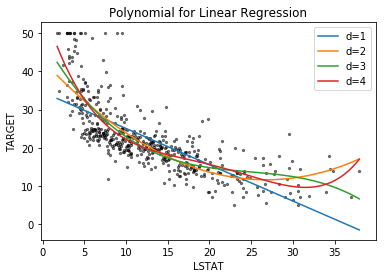

In [90]:
ds = [1, 2, 3, 4]
for d in ds:    
    steps = [
        ('poly', PolynomialFeatures(degree=d)),
        ('model', LinearRegression())
    ]
    pipe = Pipeline(steps)
    pipe.fit(data, target)
    y_axis = pipe.predict(x_axis.reshape(-1,1))
    plt.plot(x_axis, y_axis, label='d=%d' % d)
plt.legend()
plt.scatter(df.LSTAT, df.target, alpha=0.5, c='black', s=5, cmap='gray')
plt.title('Polynomial for Linear Regression')
plt.xlabel('LSTAT')
plt.ylabel('TARGET')
plt.show()

# Linear Regression with Python Scratch

In [115]:
class LinearReg(object):
    def fit(self, X, y):
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        if not isinstance(y, np.ndarray):
            y = np.array(y).reshape(-1,1)
        if X.shape[0] != y.shape[0]:
            raise ValueError('Dim input != target (%d != %d)' % (X.shape[0], y.shape[0]))
        self.coff = np.random.rand(X.shape[0]+1, 1)
        ones = np.ones(shape=(X.shape[0], 1))
        X = np.concatenate((X, ones), axis=1)
        A = np.dot(X.T, X)
        b = np.dot(X.T, y)
        self.coff = np.dot(np.linalg.pinv(A), b)
    
    def predict(self, X):
        y_pred = np.dot(X, self.coff[:-1]) + self.coff[-1]
        return y_pred.reshape(-1)

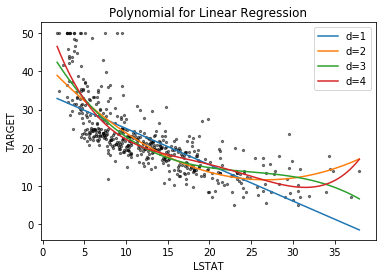

In [118]:
ds = [1, 2, 3, 4]
for d in ds:    
    steps = [
        ('poly', PolynomialFeatures(degree=d)),
        ('model', LinearReg())
    ]
    pipe = Pipeline(steps)
    pipe.fit(data, target)
    y_axis = pipe.predict(x_axis.reshape(-1,1))
    plt.plot(x_axis, y_axis, label='d=%d' % d)
plt.legend()
plt.scatter(df.LSTAT, df.target, alpha=0.5, c='black', s=5, cmap='gray')
plt.title('Polynomial for Linear Regression')
plt.xlabel('LSTAT')
plt.ylabel('TARGET')
plt.show()